In [5]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls")

source("script/packages.R"  )
source("script/input_data.R")
source("script/functions.R" )
source("script/colors.R"    )


In [6]:
diffexp_lm    = fread("pipeline/4.1.differential_expression/diffexp.txt"       , sep = "\t", header = TRUE , data.table = FALSE)
diffexp_ridge = fread("pipeline/4.15.differential_expression_ridge/diffexp.txt", sep = "\t", header = TRUE , data.table = FALSE)
diffexp_ridge_tissue = diffexp_ridge[ diffexp_ridge$covariate == "tissue",]

In [7]:
diffexp = merge(diffexp_lm, diffexp_ridge_tissue, by = c("transcript_id", "gene_id", "gene_name", "gene_type", "tissue1", "tissue2", "type"), suffixes = c("_lm", "_ridge"))

In [40]:
table(diffexp[ diffexp$type == "gene_tpm"    & diffexp$tissue1 == "ipsc_cvpc" & diffexp$tissue2 == "heart", c("diffexp_lm", "diffexp_ridge")])
table(diffexp[ diffexp$type == "gene_tpm"    & diffexp$tissue1 == "ipsc_cvpc" & diffexp$tissue2 == "arteria", c("diffexp_lm", "diffexp_ridge")])
table(diffexp[ diffexp$type == "isoform_use" & diffexp$tissue1 == "ipsc_cvpc" & diffexp$tissue2 == "heart", c("diffexp_lm", "diffexp_ridge")])


          diffexp_ridge
diffexp_lm FALSE  TRUE
     FALSE  4999   670
     TRUE   2613 12111

          diffexp_ridge
diffexp_lm FALSE TRUE
     FALSE  4517  408
     TRUE   7864 7604

          diffexp_ridge
diffexp_lm FALSE  TRUE
     FALSE 18734   267
     TRUE   6857 12413

gene_tpm ipsc_cvpc heart 0.954132700031149 0



                    diffexp_ridge
sign                 FALSE  TRUE
  1-N.S.              4999   670
  2-Stage-associated  2613     0
  3-Same sign            0 12111

gene_tpm ipsc_cvpc arteria 0.844688584156906 0



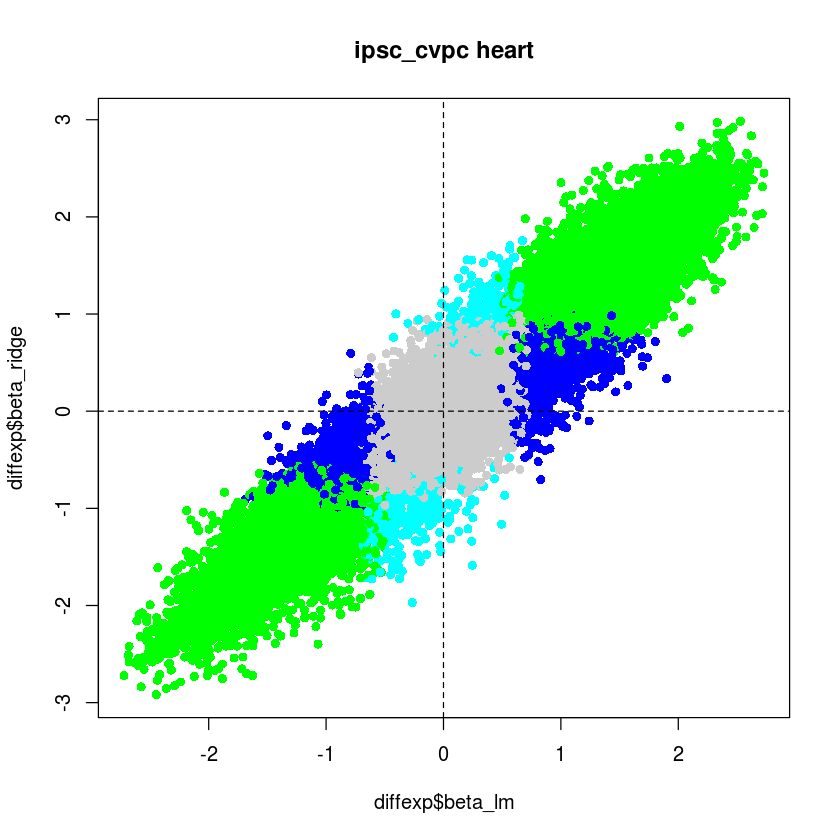

                    diffexp_ridge
sign                 FALSE TRUE
  1-N.S.              4517  408
  2-Stage-associated  7864    0
  3-Same sign            0 7579
  4-Different sign       0   25

gene_tpm heart arteria -0.0524488199833414 6.64989467238652e-14



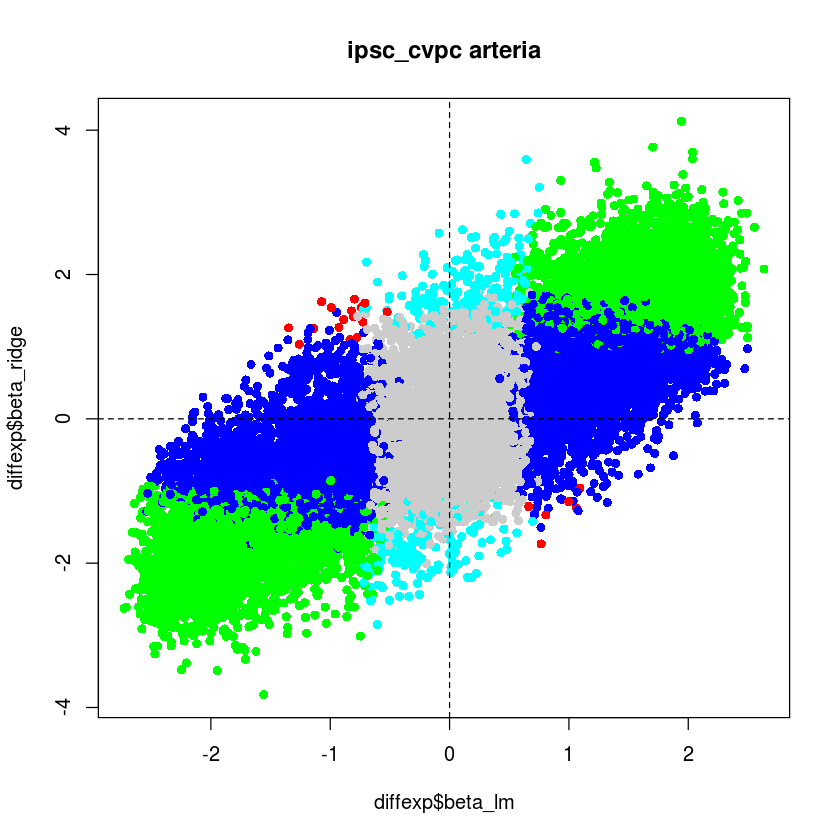

                    diffexp_ridge
sign                 FALSE  TRUE
  1-N.S.              6497   530
  2-Stage-associated 11872     0
  3-Same sign            0   560
  4-Different sign       0   934

isoform_use ipsc_cvpc heart 0.965890539849608 0



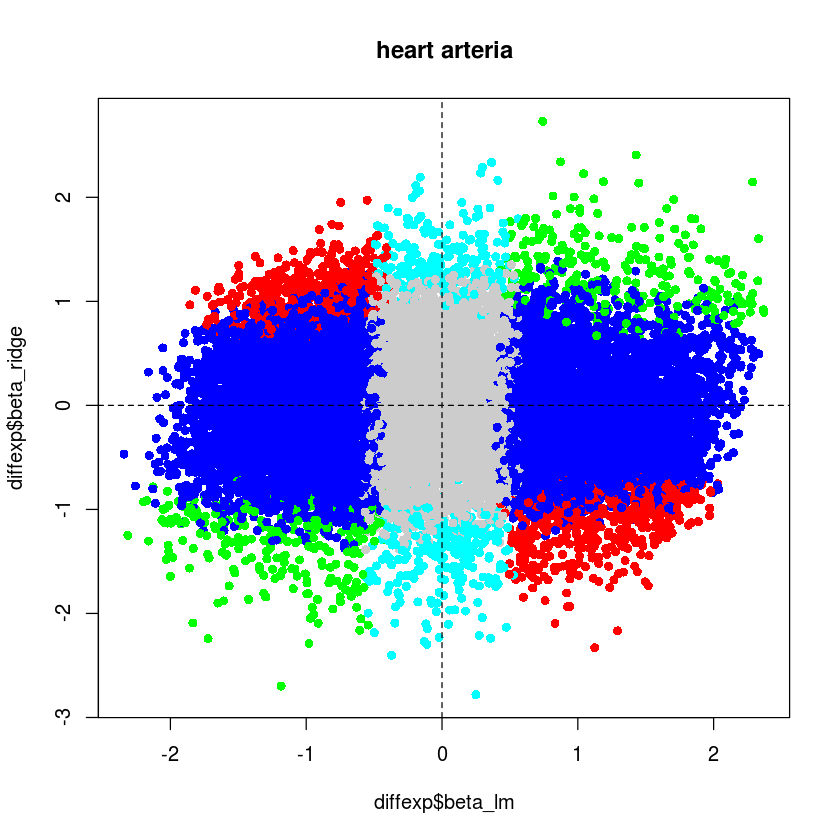

                    diffexp_ridge
sign                 FALSE  TRUE
  1-N.S.             18734   267
  2-Stage-associated  6857     0
  3-Same sign            0 12413

isoform_use ipsc_cvpc arteria 0.86719745646536 0



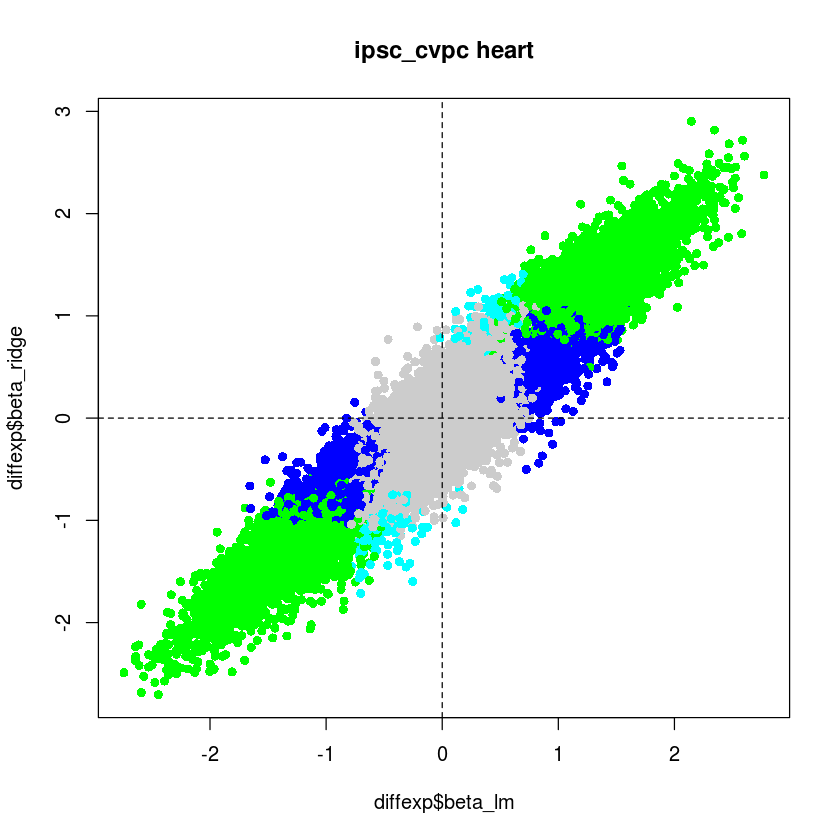

                    diffexp_ridge
sign                 FALSE  TRUE
  1-N.S.             17085   165
  2-Stage-associated 14530     0
  3-Same sign            0  6489
  4-Different sign       0     2

isoform_use heart arteria 0.199968274188508 0



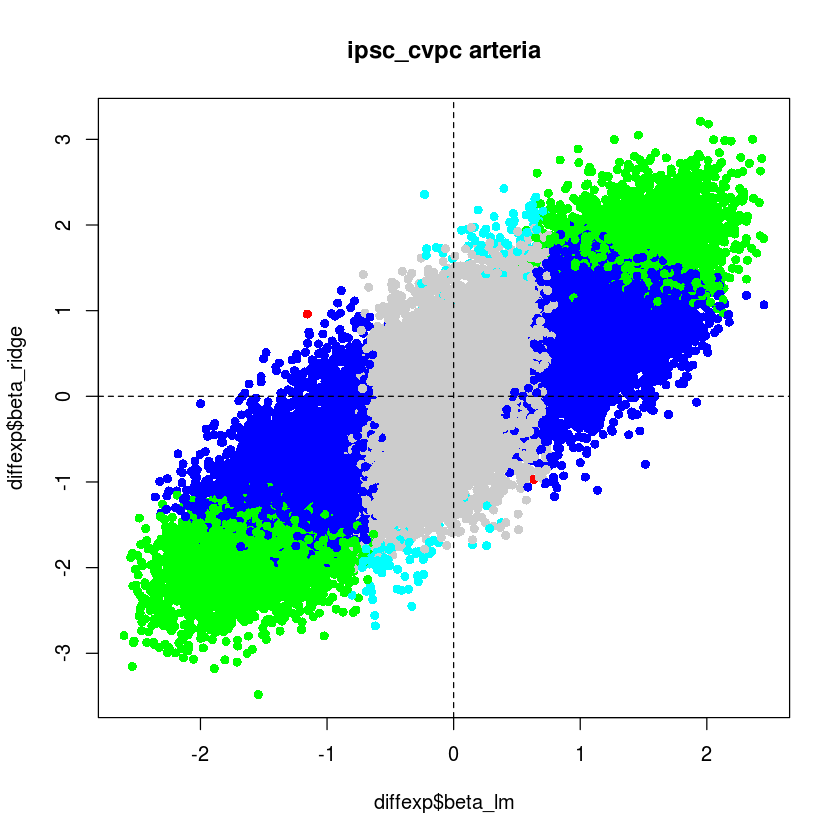

                    diffexp_ridge
sign                 FALSE  TRUE
  1-N.S.             26582    93
  2-Stage-associated 11381     0
  3-Same sign            0   190
  4-Different sign       0    25

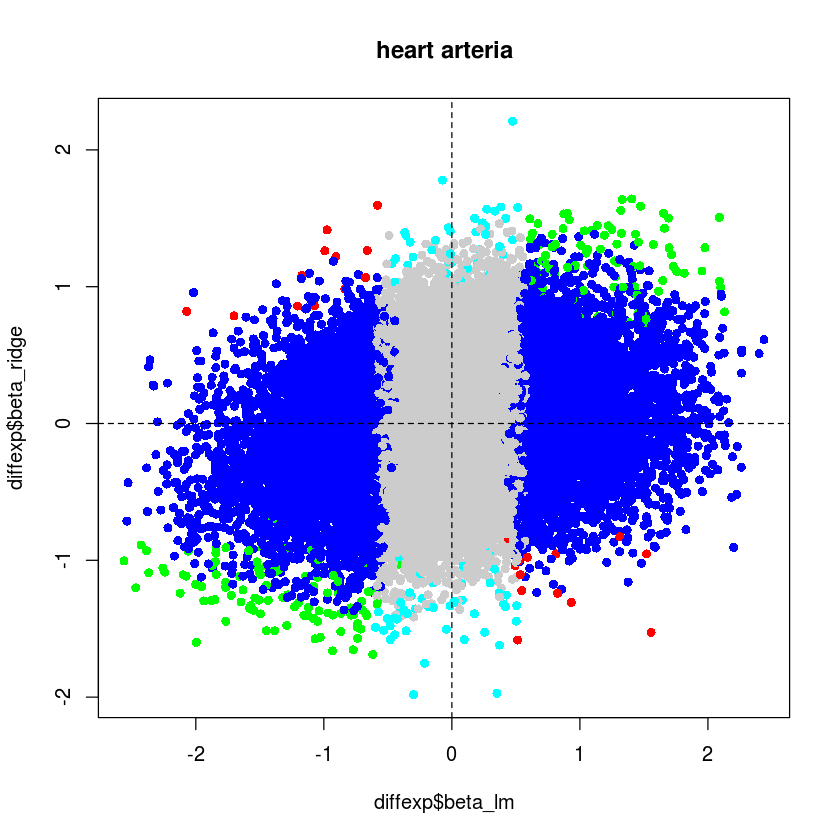

In [9]:
plot_diffexp = function(type, tissue1, tissue2, diffexp)
{
    diffexp = diffexp[ diffexp$type == type & diffexp$tissue1 == tissue1 & diffexp$tissue2 == tissue2, ]
    diffexp$color = "#cccccc"
    
    
    diffexp[ diffexp$diffexp_lm == TRUE  & diffexp$diffexp_ridge == TRUE  & sign(diffexp$beta_lm) == sign(diffexp$beta_ridge), "color"] = "#00ff00"
    diffexp[ diffexp$diffexp_lm == TRUE  & diffexp$diffexp_ridge == TRUE  & sign(diffexp$beta_lm) != sign(diffexp$beta_ridge), "color"] = "#ff0000"
    diffexp[ diffexp$diffexp_lm == TRUE  & diffexp$diffexp_ridge == FALSE, "color"] = "#0000ff"
    diffexp[ diffexp$diffexp_lm == FALSE & diffexp$diffexp_ridge == TRUE , "color"] = "#00ffff"
    diffexp[ diffexp$diffexp_lm == FALSE & diffexp$diffexp_ridge == FALSE, "color"] = "#cccccc"
    
    plot(diffexp$beta_lm, diffexp$beta_ridge, col = diffexp$color, pch = 16, main = paste(tissue1, tissue2))
    #plot(diffexp$log2r  , diffexp$beta_ridge, col = diffexp$color, pch = 16)
    
    abline(v = 0, lty = "dashed")
    abline(h = 0, lty = "dashed")
    
    mycor = cor.test(diffexp$beta_lm, diffexp$beta_ridge)
    
    #diffexp = diffexp[is.infinite(diffexp$log2r) == FALSE,]
    
    #mycor = cor.test(diffexp$log2r, diffexp$beta_ridge)
    
    message(paste(type, tissue1, tissue2, mycor$estimate, mycor$p.value))
    
    diffexp$sign = ""
    
    diffexp[diffexp$diffexp_lm == FALSE, "sign"] = "1-N.S."
    diffexp[diffexp$diffexp_lm == TRUE , "sign"] = "2-Stage-associated"
    
    diffexp[ diffexp$diffexp_lm == TRUE  & diffexp$diffexp_ridge == TRUE & sign(diffexp$beta_lm) == sign(diffexp$beta_ridge), "sign"] = "3-Same sign"
    diffexp[ diffexp$diffexp_lm == TRUE  & diffexp$diffexp_ridge == TRUE & sign(diffexp$beta_lm) != sign(diffexp$beta_ridge), "sign"] = "4-Different sign"
    
    return(table(diffexp[,c("sign", "diffexp_ridge")]))
    
}

plot_diffexp("gene_tpm"   , "ipsc_cvpc", "heart"  , diffexp)
plot_diffexp("gene_tpm"   , "ipsc_cvpc", "arteria", diffexp)
plot_diffexp("gene_tpm"   , "heart"    , "arteria", diffexp)
plot_diffexp("isoform_use", "ipsc_cvpc", "heart"  , diffexp)
plot_diffexp("isoform_use", "ipsc_cvpc", "arteria", diffexp)
plot_diffexp("isoform_use", "heart"    , "arteria", diffexp)



## Different directions

In [10]:
diffexp[diffexp$type == "gene_tpm" & diffexp$tissue1 == "ipsc_cvpc" & diffexp$tissue2 == "heart"   & diffexp$diffexp_lm == TRUE  & diffexp$diffexp_ridge == TRUE & sign(diffexp$beta_lm) != sign(diffexp$beta_ridge), c("transcript_id", "gene_name", "tissue1", "tissue2", "log2r", "beta_lm", "pval_lm", "qval_lm", "beta_ridge", "pval_ridge", "qval_ridge")]
diffexp[diffexp$type == "gene_tpm" & diffexp$tissue1 == "ipsc_cvpc" & diffexp$tissue2 == "arteria" & diffexp$diffexp_lm == TRUE  & diffexp$diffexp_ridge == TRUE & sign(diffexp$beta_lm) != sign(diffexp$beta_ridge), c("transcript_id", "gene_name", "tissue1", "tissue2", "log2r", "beta_lm", "pval_lm", "qval_lm", "beta_ridge", "pval_ridge", "qval_ridge")]


transcript_id,gene_name,tissue1,tissue2,log2r,beta_lm,pval_lm,qval_lm,beta_ridge,pval_ridge,qval_ridge
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


,transcript_id,gene_name,tissue1,tissue2,log2r,beta_lm,pval_lm,qval_lm,beta_ridge,pval_ridge,qval_ridge
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
791,ENSG00000011465.17_7,DCN,ipsc_cvpc,arteria,-1.9934241,-1.2591597,1.548942e-20,3.158757e-16,1.0340715,5.544037e-07,1.130596e-02
1847,ENSG00000051523.11_6,CYBA,ipsc_cvpc,arteria,-0.3533728,-0.8044674,1.871089e-09,3.815712e-05,1.4127477,9.386889e-10,1.914268e-05
4778,ENSG00000088808.18_9,PPP1R13B,ipsc_cvpc,arteria,1.8645421,1.0925513,1.468944e-19,2.995618e-15,-0.9577254,9.560312e-07,1.949634e-02
5177,ENSG00000091542.9_4,ALKBH5,ipsc_cvpc,arteria,0.7620350,1.0627090,1.537274e-14,3.134962e-10,-1.2366027,8.168873e-07,1.665878e-02
6470,ENSG00000100979.15_6,PLTP,ipsc_cvpc,arteria,-1.5149516,-1.3486932,4.038780e-19,8.236284e-15,1.2598953,3.125688e-07,6.374216e-03
8123,ENSG00000105246.6_4,EBI3,ipsc_cvpc,arteria,-2.7269752,-0.7479106,6.970566e-08,1.421508e-03,1.4243066,1.416453e-07,2.888573e-03
9488,ENSG00000108774.15_7,RAB5C,ipsc_cvpc,arteria,-0.4848419,-0.9269485,8.594649e-14,1.752707e-09,1.2663263,9.774926e-10,1.993401e-05
10466,ENSG00000111817.19_9,DSE,ipsc_cvpc,arteria,-0.5185036,-0.8348064,5.709721e-10,1.164383e-05,1.0970391,4.199875e-07,8.564804e-03
11276,ENSG00000114395.10_4,CYB561D2,ipsc_cvpc,arteria,-0.4775333,-0.7393960,3.510206e-07,7.158362e-03,1.5464765,2.231312e-08,4.550315e-04


# Where are RBPs

In [11]:
rbps = readLines("pipeline/rbps.txt")
length(rbps)

[1] 122

In [12]:
rbp2dif = diffexp[ diffexp$gene_name %in% rbps,]

In [41]:
table(rbp2dif[ rbp2dif$type == "gene_tpm"    & rbp2dif$tissue1 == "ipsc_cvpc" & rbp2dif$tissue2 == "heart", c("diffexp_lm", "diffexp_ridge")])
table(rbp2dif[ rbp2dif$type == "isoform_use" & rbp2dif$tissue1 == "ipsc_cvpc" & rbp2dif$tissue2 == "heart", c("diffexp_lm", "diffexp_ridge")])

rbp2dif[rbp2dif$type == "gene_tpm"    & rbp2dif$tissue1 == "ipsc_cvpc" & rbp2dif$tissue2 == "heart" & rbp2dif$diffexp_lm == TRUE  & rbp2dif$diffexp_ridge == FALSE, c("transcript_id", "gene_name", "log2r", "beta_lm", "pval_lm", "qval_lm", "beta_ridge", "pval_ridge", "qval_ridge")]
rbp2dif[rbp2dif$type == "gene_tpm"    & rbp2dif$tissue1 == "ipsc_cvpc" & rbp2dif$tissue2 == "heart" & rbp2dif$diffexp_lm == FALSE & rbp2dif$diffexp_ridge == TRUE , c("transcript_id", "gene_name", "log2r", "beta_lm", "pval_lm", "qval_lm", "beta_ridge", "pval_ridge", "qval_ridge")]

rbp2dif[rbp2dif$type == "gene_tpm"    & rbp2dif$tissue1 == "ipsc_cvpc" & rbp2dif$tissue2 == "arteria" & rbp2dif$diffexp_lm == FALSE & rbp2dif$diffexp_ridge == TRUE , c("transcript_id", "gene_name", "log2r", "beta_lm", "pval_lm", "qval_lm", "beta_ridge", "pval_ridge", "qval_ridge")]
rbp2dif[rbp2dif$type == "gene_tpm"    & rbp2dif$tissue1 == "ipsc_cvpc" & rbp2dif$tissue2 == "arteria" & rbp2dif$diffexp_lm == TRUE  & rbp2dif$diffexp_ridge == FALSE, c("transcript_id", "gene_name", "log2r", "beta_lm", "pval_lm", "qval_lm", "beta_ridge", "pval_ridge", "qval_ridge")]

rbp2dif[rbp2dif$type == "gene_tpm" & rbp2dif$diffexp_lm == TRUE  & rbp2dif$diffexp_ridge == TRUE & sign(rbp2dif$beta_lm) != sign(rbp2dif$beta_ridge), c("transcript_id", "gene_name", "tissue1", "tissue2", "log2r", "beta_lm", "pval_lm", "qval_lm", "beta_ridge", "pval_ridge", "qval_ridge")]


          diffexp_ridge
diffexp_lm FALSE TRUE
     FALSE    20    4
     TRUE      9   89

          diffexp_ridge
diffexp_lm FALSE TRUE
     FALSE   182    4
     TRUE     69  165

,transcript_id,gene_name,log2r,beta_lm,pval_lm,qval_lm,beta_ridge,pval_ridge,qval_ridge
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
120,ENSG00000003756.17_8,RBM5,0.5749839,-0.6394266,1.524493e-06,3.108898e-02,0.05184154,7.531039e-01,1.0000000
3576,ENSG00000076067.13_5,RBMS2,1.2651064,1.1226928,4.767610e-15,9.722587e-11,0.42791081,1.777203e-02,1.0000000
4995,ENSG00000090097.21_9,PCBP4,0.6408009,-0.9273940,1.613704e-11,3.290827e-07,-0.79954688,4.449374e-05,0.9073609
12168,ENSG00000116754.13_3,SRSF11,0.6195612,-0.7146750,2.739677e-12,5.587023e-08,-0.50655369,2.952261e-04,1.0000000
15075,ENSG00000126254.12_5,RBM42,1.5070932,1.2684222,1.154274e-20,2.353912e-16,0.51505751,5.748212e-03,1.0000000
25158,ENSG00000155636.15_5,RBM45,0.9725302,0.8459763,4.076799e-08,8.313815e-04,0.73556696,8.946100e-04,1.0000000
35838,ENSG00000179950.14_6,PUF60,1.5908437,1.0057794,4.216457e-17,8.598621e-13,0.63061196,2.617747e-05,0.5338372
39261,ENSG00000188529.15_6,SRSF10,1.4401113,0.5281307,2.351359e-07,4.795126e-03,0.64925666,7.480455e-06,0.1525489
54834,ENSG00000265241.7_6,RBM8A,1.6142005,0.8697744,1.155550e-12,2.356514e-08,0.53381459,2.188671e-03,1.0000000


,transcript_id,gene_name,log2r,beta_lm,pval_lm,qval_lm,beta_ridge,pval_ridge,qval_ridge
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
765,ENSG00000011304.20_8,PTBP1,1.3590473,0.1942241,2.122946e-01,1.0000000,-1.030031,3.807486e-18,7.764606e-14
10443,ENSG00000111786.9_5,SRSF9,1.1894687,-0.2389918,8.671724e-02,1.0000000,-1.333939,1.120274e-33,2.284574e-29
10602,ENSG00000112183.15_4,RBM24,1.4672395,0.4307175,1.804076e-05,0.3679052,1.089144,6.701042e-27,1.366543e-22
43830,ENSG00000214575.9_8,CPEB1,0.7567958,0.4115057,1.488471e-03,1.0000000,0.809772,2.347782e-07,4.787832e-03


,transcript_id,gene_name,log2r,beta_lm,pval_lm,qval_lm,beta_ridge,pval_ridge,qval_ridge
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4994,ENSG00000090097.21_9,PCBP4,-0.1752225,-0.5732881,7.446394e-05,1.0000000,-1.609443,1.250549e-06,2.550244e-02
23381,ENSG00000149016.16_7,TUT1,0.2710857,0.5735879,1.326660e-05,0.2705458,2.041868,1.537818e-09,3.136071e-05
28037,ENSG00000163694.15_6,RBM47,-0.4791390,0.1310763,3.826004e-01,1.0000000,2.209434,2.808178e-15,5.726717e-11


,transcript_id,gene_name,log2r,beta_lm,pval_lm,qval_lm,beta_ridge,pval_ridge,qval_ridge
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
764,ENSG00000011304.20_8,PTBP1,-0.22404018,-0.8207362,3.364586e-10,6.861401e-06,0.776282848,5.852381e-05,1.00000000
2558,ENSG00000065978.19_5,YBX1,0.73554944,1.8261387,3.021454e-59,6.161652e-55,0.985101414,1.106356e-04,1.00000000
3482,ENSG00000075292.19_5,ZNF638,-0.10167998,-0.6352277,1.039824e-06,2.120513e-02,-1.071543259,8.924522e-04,1.00000000
3548,ENSG00000075856.12_8,SART3,0.28438203,1.1088140,2.496766e-23,5.091654e-19,1.189771228,1.028743e-05,0.20979160
3815,ENSG00000078328.21_7,RBFOX1,3.90266166,0.7949968,2.238593e-27,4.565162e-23,0.256340120,1.569942e-01,1.00000000
4028,ENSG00000080802.18_5,CNOT4,0.66581689,1.9455060,3.664213e-60,7.472430e-56,0.923936115,1.623055e-04,1.00000000
4937,ENSG00000089682.16_7,RBM41,1.30095162,1.7565616,3.272568e-60,6.673747e-56,0.805238103,3.657463e-04,1.00000000
5639,ENSG00000099783.12_8,HNRNPM,0.53855724,1.2702279,1.517212e-29,3.094049e-25,0.510592517,6.006027e-02,1.00000000
6206,ENSG00000100461.18_7,RBM23,0.53975200,1.2621190,9.232228e-24,1.882728e-19,1.393772635,9.267134e-06,0.18898467


,transcript_id,gene_name,tissue1,tissue2,log2r,beta_lm,pval_lm,qval_lm,beta_ridge,pval_ridge,qval_ridge
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
763,ENSG00000011304.20_8,PTBP1,heart,arteria,-1.583087,-1.5164890,6.069886e-61,1.237832e-56,0.9834362,5.752439e-12,1.173095e-07
7894,ENSG00000104824.17_8,HNRNPL,heart,arteria,-1.177726,-0.6661222,3.745746e-15,7.638700e-11,0.8990662,2.424984e-06,4.945271e-02
12862,ENSG00000119314.15_6,PTBP3,heart,arteria,-1.415220,-0.6419453,5.615908e-11,1.145252e-06,1.2560048,7.120288e-11,1.452040e-06


In [14]:

rbp2dif[rbp2dif$type == "isoform_use"    & rbp2dif$tissue1 == "ipsc_cvpc" & rbp2dif$tissue2 == "heart" & rbp2dif$diffexp_lm == TRUE  & rbp2dif$diffexp_ridge == FALSE, c("transcript_id", "gene_name", "log2r", "beta_lm", "pval_lm", "qval_lm", "beta_ridge", "pval_ridge", "qval_ridge")]
rbp2dif[rbp2dif$type == "isoform_use"    & rbp2dif$tissue1 == "ipsc_cvpc" & rbp2dif$tissue2 == "heart" & rbp2dif$diffexp_lm == FALSE & rbp2dif$diffexp_ridge == TRUE , c("transcript_id", "gene_name", "log2r", "beta_lm", "pval_lm", "qval_lm", "beta_ridge", "pval_ridge", "qval_ridge")]



,transcript_id,gene_name,log2r,beta_lm,pval_lm,qval_lm,beta_ridge,pval_ridge,qval_ridge
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62661,ENST00000227503.13_3,SF1,0.295703997,0.8547682,1.627087e-10,6.227024e-06,0.4082359,2.562809e-02,1.00000000
62697,ENST00000228284.8_4,SART3,0.925593500,0.6606862,3.125746e-07,1.196254e-02,0.4682160,1.243723e-02,1.00000000
65196,ENST00000258742.5,NUPL2,0.454246527,0.7422345,1.138684e-07,4.357859e-03,0.9651071,1.792528e-06,0.06860183
65922,ENST00000262031.10_3,RBMS2,-0.327365255,-0.7611062,8.449584e-10,3.233740e-05,-0.8449747,2.710282e-06,0.10372518
69102,ENST00000284073.7_3,MSI2,-0.175592251,-0.5858699,7.307993e-08,2.796842e-03,-0.2512401,1.118132e-01,1.00000000
70332,ENST00000295971.12_4,RBM47,1.497886192,0.8387857,9.412099e-10,3.602105e-05,0.4571998,1.894642e-02,1.00000000
72618,ENST00000308436.11_3,TUT1,0.844532353,0.9434098,9.292227e-12,3.556228e-07,0.6753911,7.662564e-04,1.00000000
72945,ENST00000310046.9_3,RBM4B,0.232073279,0.9428427,1.717220e-11,6.571973e-07,0.9441325,4.029815e-06,0.15422506
74367,ENST00000318204.5_1,RBM24,-2.496492323,-0.7262096,1.683821e-13,6.444150e-09,-0.3855512,1.778729e-03,1.00000000


,transcript_id,gene_name,log2r,beta_lm,pval_lm,qval_lm,beta_ridge,pval_ridge,qval_ridge
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
82095,ENST00000357472.7_1,MBNL1,-1.9475628,-0.5292197,2.586894e-04,1.0000000,-1.0457924,1.041188e-06,0.039847289
95334,ENST00000395290.6_3,CELF1,0.2930610,0.3834216,3.197066e-04,1.0000000,0.7655934,1.006451e-07,0.003851789
119052,ENST00000473487.6_2,RBFOX2,0.7468224,0.5631321,1.772672e-05,0.6784192,0.9445505,5.121013e-07,0.019598630
145092,ENST00000541696.1_1,QKI,0.3668111,0.4541605,1.955429e-05,0.7483621,0.7290481,8.662980e-07,0.033154092


In [15]:
diffexp_ridge[diffexp_ridge$type == "gene_tpm"    & diffexp_ridge$tissue1 == "ipsc_cvpc" & diffexp_ridge$tissue2 == "heart" & diffexp_ridge$gene_name == "RBM20", ]


,transcript_id,gene_id,gene_name,gene_type,covariate,beta,se,pval,qval,tissue1,tissue2,type,diffexp
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>
181494,ENSG00000203867.8_4,ENSG00000203867.8_4,RBM20,protein_coding,cibersort.regular.myofibroblast,-3.4101800713,1.313054452,1.681941e-02,1.000000e+00,ipsc_cvpc,heart,gene_tpm,FALSE
181495,ENSG00000203867.8_4,ENSG00000203867.8_4,RBM20,protein_coding,cibersort.regular.endothelial,-0.6876429967,0.616331285,5.161173e-01,1.000000e+00,ipsc_cvpc,heart,gene_tpm,FALSE
181496,ENSG00000203867.8_4,ENSG00000203867.8_4,RBM20,protein_coding,total_reads_norm,0.1237996644,0.083421619,1.378026e-01,1.000000e+00,ipsc_cvpc,heart,gene_tpm,FALSE
181497,ENSG00000203867.8_4,ENSG00000203867.8_4,RBM20,protein_coding,cibersort.regular.cardiac_muscle,0.9430470651,0.193470740,3.845222e-03,1.000000e+00,ipsc_cvpc,heart,gene_tpm,FALSE
181498,ENSG00000203867.8_4,ENSG00000203867.8_4,RBM20,protein_coding,tissue,0.3366007922,0.128178707,8.638787e-03,1.000000e+00,ipsc_cvpc,heart,gene_tpm,FALSE
181499,ENSG00000203867.8_4,ENSG00000203867.8_4,RBM20,protein_coding,cibersort.regular.fibroblast,-4.3113166801,0.673283964,2.056629e-09,4.194083e-05,ipsc_cvpc,heart,gene_tpm,TRUE
181500,ENSG00000203867.8_4,ENSG00000203867.8_4,RBM20,protein_coding,cibersort.regular.smooth_muscle,1.1274699496,0.526402710,1.219906e-01,1.000000e+00,ipsc_cvpc,heart,gene_tpm,FALSE
181501,ENSG00000203867.8_4,ENSG00000203867.8_4,RBM20,protein_coding,uniquely_mapped_reads_to_canonical_chromsomes,-0.0046765879,0.002401929,5.153314e-02,1.000000e+00,ipsc_cvpc,heart,gene_tpm,FALSE
181502,ENSG00000203867.8_4,ENSG00000203867.8_4,RBM20,protein_coding,cibersort.regular.immune,-4.7872797704,0.705198525,1.559583e-10,3.180458e-06,ipsc_cvpc,heart,gene_tpm,TRUE


# Stage vs. cell type

In [16]:
stage2cell_empty = diffexp_ridge[diffexp_ridge$covariate == "tissue",c("transcript_id", "gene_id", "gene_name", "gene_type", "type", "tissue1", "tissue2", "beta", "pval", "qval", "diffexp")]
cell_types       = unique(diffexp_ridge$covariate)
cell_types       = cell_types[grepl("cibersort", cell_types) == TRUE]

stage2cell = lapply(cell_types, function(cell)
{
    x             = diffexp_ridge[diffexp_ridge$covariate == cell, c("transcript_id", "type", "tissue1", "tissue2", "beta", "pval", "qval", "diffexp")]
    out           = merge(stage2cell_empty, x, by = c("transcript_id", "type", "tissue1", "tissue2"), suffixes = c("_stage", "_cell"))
    
    return(out)
})

names(stage2cell) = gsub("cibersort.regular.", "", cell_types)

saveRDS(stage2cell, "pipeline/4.15.differential_expression_ridge/stage2cell.rds")


In [17]:
count_genes_stage_vs_cell = function(totest, ii)
{
    type      = totest[ii, "type"     ]
    tissue1   = totest[ii, "tissue1"  ]
    tissue2   = totest[ii, "tissue2"  ]
    
    out = unlist(lapply(gsub("cibersort.regular.", "", cell_types), function(cell)
    {
        x = stage2cell[[cell]]
        x = x[x$type == type & x$tissue1 == tissue1 & x$tissue2 == tissue2 & x$diffexp_stage == TRUE  &  x$diffexp_cell == TRUE  & x$beta_cell > 0, "transcript_id"]
    }))
    
    out = length(unique(out))
    
    message(paste(type, tissue1, tissue2, out))

}

totest = unique(diffexp_ridge[diffexp_ridge$covariate %in% cell_types, c("type", "tissue1", "tissue2")])

lapply(1:nrow(totest), function(ii){count_genes_stage_vs_cell(totest, ii)})


gene_tpm ipsc_cvpc heart 4637

isoform_use ipsc_cvpc heart 1356

gene_tpm ipsc_cvpc arteria 2096

isoform_use ipsc_cvpc arteria 278

gene_tpm heart arteria 1560

isoform_use heart arteria 106



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

In [18]:
stats_stage_vs_cell = function(totest, ii)
{
    type      = totest[ii, "type"     ]
    tissue1   = totest[ii, "tissue1"  ]
    tissue2   = totest[ii, "tissue2"  ]
    covariate = totest[ii, "covariate"]
    
    x = stage2cell[[sub("cibersort.regular.", "", covariate)]]
    x = x[x$type == type & x$tissue1 == tissue1 & x$tissue2 == tissue2,]
    
    out = data.frame(only_stage = nrow(x[x$diffexp_stage == TRUE  & (x$diffexp_cell == FALSE | x$beta_cell < 0),]),
                     only_cell  = nrow(x[x$diffexp_stage == FALSE &  x$diffexp_cell == TRUE  & x$beta_cell > 0 ,]),
                     both       = nrow(x[x$diffexp_stage == TRUE  &  x$diffexp_cell == TRUE  & x$beta_cell > 0 ,])
                    )
    return(out)
}

totest       = unique(diffexp_ridge[diffexp_ridge$covariate %in% cell_types, c("type", "tissue1", "tissue2", "covariate")])
stage2cell_n = cbind(totest, as.data.frame(rbindlist(lapply(1:nrow(totest), function(ii){stats_stage_vs_cell(totest, ii)})), stringsAsFactors = FALSE))

fwrite(stage2cell_n, "pipeline/4.15.differential_expression_ridge/stage2cell_n.txt", sep = "\t", col.names = TRUE, row.names = FALSE)

stage2cell_n

,type,tissue1,tissue2,covariate,only_stage,only_cell,both
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,gene_tpm,ipsc_cvpc,heart,cibersort.regular.cardiac_neuron,11936,471,845
2,gene_tpm,ipsc_cvpc,heart,cibersort.regular.myofibroblast,12495,135,286
3,gene_tpm,ipsc_cvpc,heart,cibersort.regular.endocardial,12461,170,320
5,gene_tpm,ipsc_cvpc,heart,cibersort.regular.immune,12269,188,512
6,gene_tpm,ipsc_cvpc,heart,cibersort.regular.endothelial,12339,180,442
8,gene_tpm,ipsc_cvpc,heart,cibersort.regular.cardiac_muscle,12168,498,613
10,gene_tpm,ipsc_cvpc,heart,cibersort.regular.fibroblast,10365,1328,2416
11,gene_tpm,ipsc_cvpc,heart,cibersort.regular.smooth_muscle,12695,40,86
265111,isoform_use,ipsc_cvpc,heart,cibersort.regular.endothelial,12674,4,6


In [36]:
#x = stage2cell[["cardiac_muscle"]]
#
#x = x[ x$type == "isoform_use" & x$tissue1 == "ipsc_cvpc" & x$tissue2 == "heart" & x$diffexp_stage == TRUE  &  x$diffexp_cell == TRUE  & x$beta_cell > 0,]
#x$score1 = x$pval_stage * x$pval_cell
#x$score2 = abs(x$beta_stage) + x$beta_cell
#
#x = x[order(x$pval_cell),]
#
#x[1:30,]
#

x = stage2cell[["cardiac_muscle"]]
#x[x$gene_name == "PTBP1",]
x[x$gene_name == "EXOC7",]





x = stage2cell[["cardiac_neuron"]]
#x[x$gene_name == "PTBP1",]
x[x$gene_name == "EXOC7",]



,transcript_id,type,tissue1,tissue2,gene_id,gene_name,gene_type,beta_stage,pval_stage,qval_stage,diffexp_stage,beta_cell,pval_cell,qval_cell,diffexp_cell
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>
36616,ENSG00000182473.22_6,gene_tpm,heart,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.001975515,9.939157e-01,1.000000e+00,FALSE,-0.9199763,2.987809e-02,1.000000e+00,FALSE
36617,ENSG00000182473.22_6,gene_tpm,ipsc_cvpc,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.725043220,4.511432e-02,1.000000e+00,FALSE,-1.1812547,1.002725e-01,1.000000e+00,FALSE
36618,ENSG00000182473.22_6,gene_tpm,ipsc_cvpc,heart,ENSG00000182473.22_6,EXOC7,protein_coding,1.115910400,5.856459e-10,1.194308e-05,TRUE,-0.3102710,1.000000e+00,1.000000e+00,FALSE
76720,ENST00000332065.9_2,isoform_use,heart,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.180443347,2.343458e-01,1.000000e+00,FALSE,-1.7573842,5.323949e-16,2.037528e-11,TRUE
76721,ENST00000332065.9_2,isoform_use,ipsc_cvpc,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.721690101,1.035107e-03,1.000000e+00,FALSE,-4.4918462,3.729293e-37,1.427238e-32,TRUE
76722,ENST00000332065.9_2,isoform_use,ipsc_cvpc,heart,ENSG00000182473.22_6,EXOC7,protein_coding,-1.420934778,3.724332e-40,1.425339e-35,TRUE,-2.0011168,1.486135e-23,5.687588e-19,TRUE
116302,ENST00000467586.5_2,isoform_use,heart,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.233995877,4.201804e-01,1.000000e+00,FALSE,-0.2879174,8.384674e-01,1.000000e+00,FALSE
116303,ENST00000467586.5_2,isoform_use,ipsc_cvpc,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,-2.120354232,3.918757e-09,1.499748e-04,TRUE,1.5191371,2.279559e-02,1.000000e+00,FALSE
116304,ENST00000467586.5_2,isoform_use,ipsc_cvpc,heart,ENSG00000182473.22_6,EXOC7,protein_coding,-0.257239271,1.669122e-01,1.000000e+00,FALSE,0.3213710,1.000000e+00,1.000000e+00,FALSE


,transcript_id,type,tissue1,tissue2,gene_id,gene_name,gene_type,beta_stage,pval_stage,qval_stage,diffexp_stage,beta_cell,pval_cell,qval_cell,diffexp_cell
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>
36616,ENSG00000182473.22_6,gene_tpm,heart,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.001975515,9.939157e-01,1.000000e+00,FALSE,2.64819938,3.448522e-01,1.000000e+00,FALSE
36617,ENSG00000182473.22_6,gene_tpm,ipsc_cvpc,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.725043220,4.511432e-02,1.000000e+00,FALSE,-2.00011839,4.237755e-01,1.000000e+00,FALSE
36618,ENSG00000182473.22_6,gene_tpm,ipsc_cvpc,heart,ENSG00000182473.22_6,EXOC7,protein_coding,1.115910400,5.856459e-10,1.194308e-05,TRUE,-7.35621514,9.524513e-04,1.000000e+00,FALSE
76720,ENST00000332065.9_2,isoform_use,heart,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.180443347,2.343458e-01,1.000000e+00,FALSE,0.13007506,9.925395e-01,1.000000e+00,FALSE
76721,ENST00000332065.9_2,isoform_use,ipsc_cvpc,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.721690101,1.035107e-03,1.000000e+00,FALSE,2.89805243,4.975743e-02,1.000000e+00,FALSE
76722,ENST00000332065.9_2,isoform_use,ipsc_cvpc,heart,ENSG00000182473.22_6,EXOC7,protein_coding,-1.420934778,3.724332e-40,1.425339e-35,TRUE,14.75756696,6.417709e-30,2.456121e-25,TRUE
116302,ENST00000467586.5_2,isoform_use,heart,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,0.233995877,4.201804e-01,1.000000e+00,FALSE,-3.67827637,2.356622e-01,1.000000e+00,FALSE
116303,ENST00000467586.5_2,isoform_use,ipsc_cvpc,arteria,ENSG00000182473.22_6,EXOC7,protein_coding,-2.120354232,3.918757e-09,1.499748e-04,TRUE,-1.82230012,4.680972e-01,1.000000e+00,FALSE
116304,ENST00000467586.5_2,isoform_use,ipsc_cvpc,heart,ENSG00000182473.22_6,EXOC7,protein_coding,-0.257239271,1.669122e-01,1.000000e+00,FALSE,-2.39175246,3.386148e-01,1.000000e+00,FALSE


In [20]:
1+1

[1] 2

gene_tpm cibersort.regular.cardiac_muscle ipsc_cvpc heart 0.0961715190760671 4.15286644840738e-43



                    diffexp_cell
sign                 FALSE  TRUE
  1-N.S.              6831   781
  2-Stage-associated 11783     0
  3-Same sign            0   526
  4-Different sign       0   472

gene_tpm cibersort.regular.smooth_muscle ipsc_cvpc arteria 0.324890089826237 0



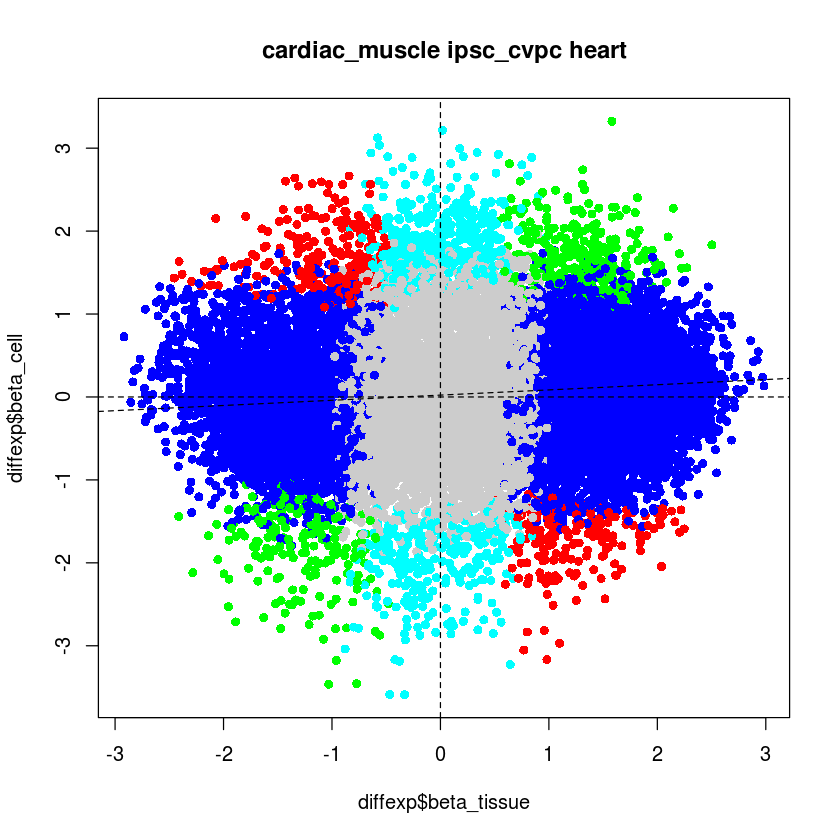

                    diffexp_cell
sign                 FALSE  TRUE
  1-N.S.             11942   439
  2-Stage-associated  7626     0
  3-Same sign            0   300
  4-Different sign       0    86

gene_tpm cibersort.regular.smooth_muscle heart arteria 0.469265497494032 0



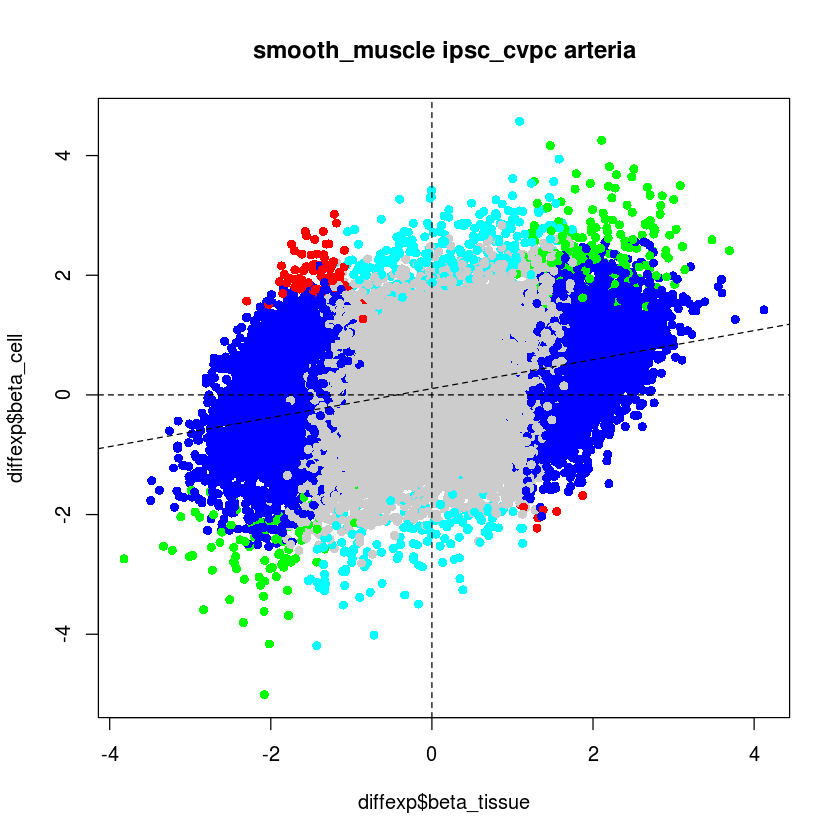

                    diffexp_cell
sign                 FALSE  TRUE
  1-N.S.             15568  2801
  2-Stage-associated  1261     0
  3-Same sign            0   705
  4-Different sign       0    58

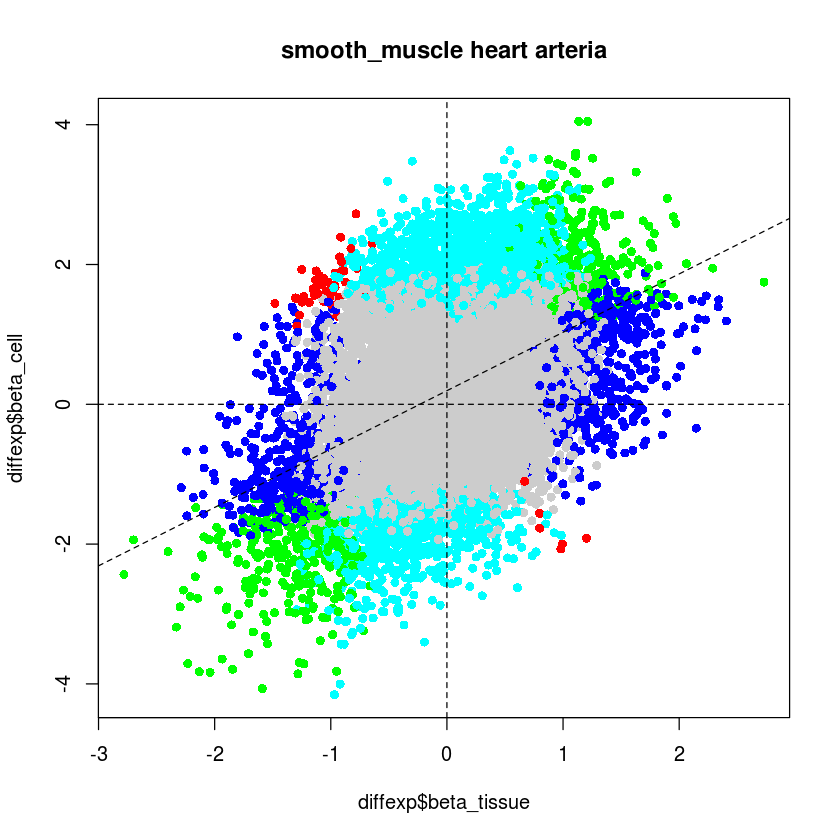

In [21]:
plot_diffexp_cell = function(type, cell, tissue1, tissue2, diffexp)
{
    diffexp = diffexp[ diffexp$type == type & diffexp$tissue1 == tissue1 & diffexp$tissue2 == tissue2, ]
    
    diffexp = merge(diffexp[diffexp$covariate == "tissue", c("transcript_id", "gene_id", "gene_name", "beta", "pval", "qval", "diffexp")],
                    diffexp[diffexp$covariate == cell    , c("transcript_id", "gene_id", "gene_name", "beta", "pval", "qval", "diffexp")],
                    by = c("transcript_id", "gene_id", "gene_name"),
                    suffixes = c("_tissue", "_cell")
                   )
    
    diffexp$color = "#cccccc"
    
    diffexp[ diffexp$diffexp_tissue == TRUE  & diffexp$diffexp_cell == TRUE & sign(diffexp$beta_tissue) == sign(diffexp$beta_cell), "color"] = "#00ff00"
    diffexp[ diffexp$diffexp_tissue == TRUE  & diffexp$diffexp_cell == TRUE & sign(diffexp$beta_tissue) != sign(diffexp$beta_cell), "color"] = "#ff0000"
    diffexp[ diffexp$diffexp_tissue == TRUE  & diffexp$diffexp_cell == FALSE, "color"] = "#0000ff"
    diffexp[ diffexp$diffexp_tissue == FALSE & diffexp$diffexp_cell == TRUE , "color"] = "#00ffff"
    diffexp[ diffexp$diffexp_tissue == FALSE & diffexp$diffexp_cell == FALSE, "color"] = "#cccccc"
    
    plot(diffexp$beta_tissue, diffexp$beta_cell, col = diffexp$color, pch = 16, main = paste(sub("cibersort.regular.", "", cell), tissue1, tissue2))
    
    abline(v = 0, lty = "dashed")
    abline(h = 0, lty = "dashed")
    abline(lm(beta_cell ~ beta_tissue, data = diffexp), lty = "dashed")
    
    mycor = cor.test(diffexp$beta_tissue, diffexp$beta_cell)
    
    #diffexp = diffexp[is.infinite(diffexp$log2r) == FALSE,]
    
    #mycor = cor.test(diffexp$log2r, diffexp$beta_ridge)
    
    message(paste(type, cell, tissue1, tissue2, mycor$estimate, mycor$p.value))
    
    diffexp$sign = ""
    
    diffexp[diffexp$diffexp_tissue == FALSE, "sign"] = "1-N.S."
    diffexp[diffexp$diffexp_tissue == TRUE , "sign"] = "2-Stage-associated"
    
    diffexp[ diffexp$diffexp_tissue == TRUE  & diffexp$diffexp_cell == TRUE & sign(diffexp$beta_tissue) == sign(diffexp$beta_cell), "sign"] = "3-Same sign"
    diffexp[ diffexp$diffexp_tissue == TRUE  & diffexp$diffexp_cell == TRUE & sign(diffexp$beta_tissue) != sign(diffexp$beta_cell), "sign"] = "4-Different sign"
    
    return(table(diffexp[,c("sign", "diffexp_cell")]))
}

plot_diffexp_cell("gene_tpm"   , "cibersort.regular.cardiac_muscle", "ipsc_cvpc", "heart"  , diffexp_ridge)
plot_diffexp_cell("gene_tpm"   , "cibersort.regular.smooth_muscle" , "ipsc_cvpc", "arteria", diffexp_ridge)
plot_diffexp_cell("gene_tpm"   , "cibersort.regular.smooth_muscle" , "heart"    , "arteria", diffexp_ridge)


In [22]:
str(diffexp_ridge)

'data.frame':	2287896 obs. of  13 variables:
 $ transcript_id: chr  "ENSG00000000003.15_5" "ENSG00000000003.15_5" "ENSG00000000003.15_5" "ENSG00000000003.15_5" ...
 $ gene_id      : chr  "ENSG00000000003.15_5" "ENSG00000000003.15_5" "ENSG00000000003.15_5" "ENSG00000000003.15_5" ...
 $ gene_name    : chr  "TSPAN6" "TSPAN6" "TSPAN6" "TSPAN6" ...
 $ gene_type    : chr  "protein_coding" "protein_coding" "protein_coding" "protein_coding" ...
 $ covariate    : chr  "cibersort.regular.cardiac_neuron" "cibersort.regular.myofibroblast" "cibersort.regular.endocardial" "mitochondrial_reads" ...
 $ beta         : num  5.05091 -4.00926 -1.16538 0.00725 1.13543 ...
 $ se           : num  1.77835 1.53083 1.00096 0.00338 0.82216 ...
 $ pval         : num  0.00721 0.01461 0.37494 0.03184 0.29497 ...
 $ qval         : num  1 1 1 1 1 ...
 $ tissue1      : chr  "ipsc_cvpc" "ipsc_cvpc" "ipsc_cvpc" "ipsc_cvpc" ...
 $ tissue2      : chr  "heart" "heart" "heart" "heart" ...
 $ type         : chr  "gene_tpm" "

In [23]:
a = diffexp_ridge[ diffexp_ridge$covariate == "cibersort.regular.cardiac_muscle" & diffexp_ridge$tissue1 == "ipsc_cvpc" & diffexp_ridge$tissue2 == "heart",]
a[order(a$beta),]

,transcript_id,gene_id,gene_name,gene_type,covariate,beta,se,pval,qval,tissue1,tissue2,type,diffexp
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>
122766,ENSG00000164054.15_6,ENSG00000164054.15_6,SHISA5,protein_coding,cibersort.regular.cardiac_muscle,-3.589517,0.1887145,1.023133e-64,2.086474e-60,ipsc_cvpc,heart,gene_tpm,TRUE
53654,ENSG00000117385.16_5,ENSG00000117385.16_5,P3H1,protein_coding,cibersort.regular.cardiac_muscle,-3.587623,0.2103575,2.223685e-52,4.534762e-48,ipsc_cvpc,heart,gene_tpm,TRUE
3305,ENSG00000011304.20_8,ENSG00000011304.20_8,PTBP1,protein_coding,cibersort.regular.cardiac_muscle,-3.463968,0.1790235,2.420369e-66,4.935858e-62,ipsc_cvpc,heart,gene_tpm,TRUE
57941,ENSG00000120708.17_7,ENSG00000120708.17_7,TGFBI,protein_coding,cibersort.regular.cardiac_muscle,-3.457865,0.2337516,1.679904e-39,3.425828e-35,ipsc_cvpc,heart,gene_tpm,TRUE
100591,ENSG00000148396.18_6,ENSG00000148396.18_6,SEC16A,protein_coding,cibersort.regular.cardiac_muscle,-3.226851,0.2526346,2.223362e-29,4.534102e-25,ipsc_cvpc,heart,gene_tpm,TRUE
134333,ENSG00000168487.19_6,ENSG00000168487.19_6,BMP1,protein_coding,cibersort.regular.cardiac_muscle,-3.187670,0.1892888,1.213782e-49,2.475266e-45,ipsc_cvpc,heart,gene_tpm,TRUE
90502,ENSG00000141522.12_5,ENSG00000141522.12_5,ARHGDIA,protein_coding,cibersort.regular.cardiac_muscle,-3.177110,0.1734390,2.337233e-58,4.766319e-54,ipsc_cvpc,heart,gene_tpm,TRUE
5926,ENSG00000034510.6_4,ENSG00000034510.6_4,TMSB10,protein_coding,cibersort.regular.cardiac_muscle,-3.166586,0.1932350,5.097799e-47,1.039594e-42,ipsc_cvpc,heart,gene_tpm,TRUE
164675,ENSG00000185475.11_6,ENSG00000185475.11_6,TMEM179B,protein_coding,cibersort.regular.cardiac_muscle,-3.166176,0.2461707,1.273666e-29,2.597386e-25,ipsc_cvpc,heart,gene_tpm,TRUE
